In [16]:
import numpy as np
import csv
import random
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt('./Datasets/q2/train.csv', delimiter=',', dtype=str)

In [3]:
d = {'b':0, 'c':0, 'u':0, 'e':0, 'z':0, 'r':0}
for row in data:
    if row[11] != '?':
        d[row[11]] += 1

mode = max(d, key=d.get)

for row in data:
    if row[11] == '?':
        d[row[11]] = mode

In [4]:
a = data.shape
n1 = int(0.8*a[0])
n2 = a[1]

In [5]:
np.random.shuffle(data)

In [6]:
train_data = data[0:n1,:]
validation_data = data[n1:a[0],:]

In [7]:
x_train = train_data[:,1:n2]
y_train = train_data[:,0]

In [8]:
x_validation = validation_data[:,1:n2]
y_validation = validation_data[:,0]

In [9]:
def hamming_distance(a,b):
    n = a.shape
    dist = 0
    for i in range(0,n[0]):
        if a[i] != b[i]:
            dist += 1
        
    return dist

In [10]:
def knnClassifier(validation_point, k):
    distance = []

    for train_point in x_train:
        distance.append(hamming_distance(train_point, validation_point))
        
    idx = np.argpartition(distance, k)
    y_predicted = []
    
    for i in range(0,k):
        y_predicted.append(y_train[np.where(idx == i)])
        
#     ans = random.choice(y_predicted)
    
    d = {'e': 0, 'p': 0}
    
    for i in y_predicted:
        d[i[0]] += 1
    
    ans = max(d, key=d.get)
        
    return ans

In [18]:
accuracy = []
f1scores = []
for k in range(1,10):
    y_predicted = []
    for i in x_validation:
        y_predicted.append(knnClassifier(i, k))
    
    accuracy.append(accuracy_score(y_validation, y_predicted))
    f1scores.append(f1_score(y_validation, y_predicted, average=None))

In [19]:
print(accuracy)

[1.0, 1.0, 0.6766666666666666, 0.6977777777777778, 0.7311111111111112, 0.73, 0.7377777777777778, 0.7588888888888888, 0.7344444444444445]


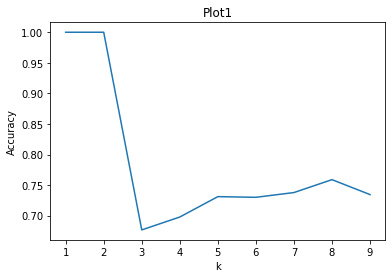

In [20]:
k = [1,2,3,4,5,6,7,8,9]
plt.plot(k, accuracy)  
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Plot1')
plt.show() 

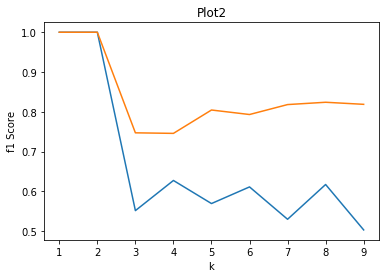

In [21]:
k = [1,2,3,4,5,6,7,8,9]
plt.plot(k, f1scores)  
plt.xlabel('k')
plt.ylabel('f1 Score')
plt.title('Plot2')
plt.show()

In [22]:
print(f1scores)

[array([1., 1.]), array([1., 1.]), array([0.55161787, 0.74717637]), array([0.62739726, 0.74579439]), array([0.56939502, 0.80452342]), array([0.6112    , 0.79319149]), array([0.52988048, 0.81818182]), array([0.61728395, 0.82400649]), array([0.5031185 , 0.81880212])]
